# 🇮🇳🇵🇰 India-Pakistan Conflict Escalation – May 2025
This notebook analyzes the escalation between India and Pakistan during May 2025, focusing on Operation Sindoor and Pakistan's retaliation.

We explore:
- Geospatial and temporal patterns
- Narrative divergence between countries
- Civilian vs military targeting
- Source bias and aming



## Project Objective

This project investigates the May 2025 military escalation between India and Pakistan — particularly Operation Sindoor — through the lens of data science. The goal is to extract structured, analyzable insights from news media narratives, enabling a multi-perspective analysis of conflict dynamics, framing, and escalation patterns.

**🇵🇰 Pakistan's Response**

Pakistan has condemned the missile strikes as an "unprovoked and blatant act of war." In retaliation, Pakistan claims to have shot down five Indian jets and launched counter-strikes, including the destruction of an Indian brigade headquarters. An emergency has been declared in Pakistan's Punjab province, and national security meetings have been convened.

- https://www.thetimes.com/world/asia/article/india-air-strike-pakistan-operation-sindoor-latest-news-vfnvvj7n3?utm_source=chatgpt.com&region=global


**Summary of Recent Attacks**

- Indian Missile Strikes: Nine locations targeted in Pakistan and Pakistan-administered Kashmir, resulting in significant civilian casualties.
- Pakistani Retaliation: Claims of downing five Indian jets and conducting counter-strikes on Indian military positions.
- Casualties: At least 26 civilians killed and 46 injured in Pakistan; casualties on the Indian side are currently unconfirmed.

**Resources**
- https://www.thetimes.com/world/asia/article/india-air-strike-pakistan-operation-sindoor-latest-news-vfnvvj7n3?utm_source=chatgpt.com&region=global
- https://www.reuters.com/world/asia-pacific/multiple-loud-explosions-heard-pakistani-kashmir-reuters-witness-2025-05-06/?utm_source=chatgpt.com
- https://www.axios.com/2025/05/07/india-pakistan-kashmir-conflict-modi?utm_source=chatgpt.com
- https://www.bild.de/politik/kaschmir-konflikt-indien-fliegt-luftangriffe-auf-ziele-in-pakistan-681a74621b2a57670fbec4a8?utm_source=chatgpt.com

**Objective**
- To analyze, visualize, and infer patterns from the India-Pakistan conflict escalation in May 2025, using geospatial, textual, and temporal data.

**Sub-Objectives:**
- Map and measure distances between strike sites and military bases.
- Create a timeline of incidents from public news sources.
- Use text mining to understand sentiment and framing in coverage.

This data science project examines the May 2025 escalation between India and Pakistan, particularly Operation Sindoor and its aftermath. The methodology focuses on curating credible, structured, and analyzable data from publicly available news sources.

**Step 1: News Source Selection**
- News articles were sourced from a combination of international, Indian, and Pakistani media outlets, including:
    - The Times (UK), Reuters, Axios, Bild.de
    - Dawn, Express Tribune, The News
    - The Hindu, Hindustan Times, Times of India

Sources were chosen based on credibility, relevance, and temporal proximity to the events.

**Step 2: Extraction and Analysis with LLM**
- News articles were processed using GPT-4o, a large language model, to:
    - Extract structured information (event time, location, actors, casualties)
    - Summarize differing national and global viewpoints
    - Identify inconsistencies and framing differences between sources

**Step 3:Dataset Construction**
- A custom events.csv dataset was built manually and semi-automatically, incorporating:
    - Geotagged event locations
    - Timed narrative summaries from Indian, Pakistani, and global perspectives
    - Derived fields such as event type, casualties, and sentiment indicators

**Step 4: Analysis & Visualization**
- The structured dataset was analyzed in a Jupyter Notebook environment using:
    - Temporal plots (event timelines, cumulative strikes)
    - Geospatial maps (Folium + GeoJSON overlays)
    - Source bias and framing analysis (qualitative review + LLM summaries)

**Data Summary**
Attribute	Description
datetime	Timestamp of the reported event or narrative entry
location	Named place where the event occurred (e.g., Muzaffarabad)
lat, lon	Geographical coordinates for mapping
country	Country in which the location lies (PK or IN)
event_type	Descriptive label (e.g., Missile Strike, Retaliation)
intensity	Estimated impact: High, Medium, or Low
actor	Initiator of the event (India, Pakistan, Unknown)
target	Type of target (e.g., Civilian, Military, Religious Site)
casualties	Reported deaths or injuries (structured or free-text)
description	Narrative description extracted via LLM
source	URL or name of the article from which the data was derived

# Methodology

**Phase 1: Source Curation and Selection**
- News Source Identification: Articles were selected from reputable Indian, Pakistani, and international outlets based on:
    - Credibility and factual reporting
    - Geopolitical relevance
    - Proximity to the event timeline

**Key Sources:**
- Indian: The Hindu, Hindustan Times, Times of India
- Pakistani: Dawn, The News, Express Tribune
- International: The Times (UK), Reuters, Axios, Bild.de

RSS Feeds & Manual Scraping: RSS feeds were used where available. Otherwise, articles were manually collected and parsed.

**Phase 2: Information Extraction (LLM-Assisted)**
- Large Language Model (GPT-4o) was used to:
    - Extract structured fields from news articles: datetime, location, actor, target, event_type, casualties, description
    - Classify source viewpoints: Indian_view, Pakistani_view, Global_view
    - Detect narrative divergence and framing differences
- Viewpoint Grid was constructed for each hour block to summarize perspective shifts and information lags.

**Phase 3: Dataset Construction**
- Primary Dataset (events.csv) built using:
    - Manual + semi-automated LLM outputs
    - Event-level geotagging (lat, lon)
    - Normalized categories:
        - actor: India, Pakistan, Unknown
        - target: Civilian, Military, Religious Site
        - intensity: High, Medium, Low
        - event_type: Strike, Retaliation, Downing, Casualty Report, etc.
- Source Metadata included: source, source_type, confirmed_status

**Phase 4: Analysis & Visualization**
1. Temporal Trends
    - Time-series of cumulative events
    - Hour-by-hour escalation visualizations
    - Lag comparison in reporting across Indian, Pakistani, and global outlets
2. Geospatial Mapping
    - Folium maps of strike and retaliation zones
    - GeoJSON overlays with provincial boundaries
    - Distance analysis between airbases, targets, and civilian zones
3. Narrative & Bias Analysis
    - Comparative viewpoint summaries
    - Source sentiment scoring (planned with NLP models)
    - Missingness and silence visualization in reporting
4. Choropleth & Phase Tagging
    - Region-wise event count heatmaps
    - Conflict phase tagging (e.g., Pre-Strike, Initial Strike, Retaliation, Diplomatic Phase)

##  2. Load Packages 

In [7]:
!pip install feedparser geopy pandas

In [8]:
# Import Modules
import pandas as pd
import folium
from folium.plugins import TimestampedGeoJson
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import requests
from newspaper import Article
from datetime import datetime
from bs4 import BeautifulSoup
import feedparser
from geopy.geocoders import Nominatim
import re

## 3. Load Data

In [10]:
# Update path as needed
events_df = pd.read_csv("data/events_with_viewpoints.csv", parse_dates=["datetime"], encoding="windows-1252")
display(events_df.head())

,event_id,datetime,location,country,lat,lon,event_type,intensity,description,source,...,Injured,Injured_Civillians,sentiment_ML,source_type_ML,strike_type_ML,is_retaliation_ML,confirmed_ML,indian_view,pakistani_view,global_view
0,20.0,07/05/2025,Ahmedpur East,Pakistan,29.14,71.26,Airstrike,High,"Indian airstrike killed 13 civilians, includin...",https://tribune.com.pk/,...,37.0,0.0,Negative,News,Aerial Bombardment,FALSE,TRUE,No specific mention of Ahmedpur East in Indian...,"Highlighted as a massacre of civilians, citing...",This specific strike was not isolated in inter...
1,24.0,07/05/2025,Ahmedpur East,Pakistan,29.14,71.26,Airstrike,High,Indian airstrike killed 13 civilians including...,https://tribune.com.pk/,...,37.0,0.0,Negative,News Media,Missile/Air/Drone Strike,FALSE,TRUE,Indian authorities did not acknowledge this sp...,Heavily emphasized the civilian toll—particula...,Although this strike wasn't cited individually...
2,29.0,07/05/2025,Ahmedpur East,Pakistan,29.14,71.26,airstrike,high,13 civilians martyred including children and w...,https://www.thenews.com.pk/latest/1309099-thre...,...,37.0,0.0,negative,news,airstrike,FALSE,TRUE,No Indian media acknowledged this mosque strik...,Framed as a deliberate and brutal attack on a ...,This specific incident was not reported in glo...
3,45.0,07/05/2025,Ankara,Turkey,39.92,32.85,Diplomatic Support,Medium,Turkey and Azerbaijan issued official statemen...,https://www.hindustantimes.com/india-news/turk...,...,0.0,0.0,Negative towards India,News,Diplomatic,FALSE,TRUE,Indian media framed these statements as predic...,Welcomed the diplomatic support as validation ...,The international reaction was mixed—while som...
4,3.0,07/05/2025,Bahawalpur,Pakistan,29.40,71.68,Airspace Incursion,High,Suspected IAF jets breached Pakistani airspace...,Express Tribune,...,0.0,0.0,-,-,-,-,-,(No official Indian acknowledgement or reporti...,Pakistani media framed the incident as a viola...,(No global reports on this specific airspace i...


In [11]:
events_df.shape # (rows, columns)

(70, 25)

In [12]:
events_df.columns # Column names

Index(['event_id', 'datetime', 'location', 'country', 'lat', 'lon',
       'event_type', 'intensity', 'description', 'source', 'actor', 'target',
       'casualties_ML', 'Killed', 'Killed_Civillians', 'Injured',
       'Injured_Civillians', 'sentiment_ML', 'source_type_ML',
       'strike_type_ML', 'is_retaliation_ML', 'confirmed_ML', 'indian_view',
       'pakistani_view', 'global_view'],
      dtype='object')

In [13]:
events_df.info() # No need to wrap in print or f-string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id            68 non-null     float64
 1   datetime            68 non-null     object 
 2   location            68 non-null     object 
 3   country             68 non-null     object 
 4   lat                 67 non-null     float64
 5   lon                 67 non-null     float64
 6   event_type          68 non-null     object 
 7   intensity           68 non-null     object 
 8   description         68 non-null     object 
 9   source              68 non-null     object 
 10  actor               68 non-null     object 
 11  target              68 non-null     object 
 12  casualties_ML       67 non-null     object 
 13  Killed              69 non-null     float64
 14  Killed_Civillians   68 non-null     float64
 15  Injured             68 non-null     float64
 16  Injured_Ci

## Quick Overview of Data

In [15]:
events_df.describe()

,event_id,lat,lon,Killed,Killed_Civillians,Injured,Injured_Civillians
count,68.000000,67.000000,67.000000,69.000000,68.000000,68.000000,68.000000
mean,23.544118,32.195373,72.957761,7.144928,4.205882,13.617647,2.058824
std,12.716699,3.150273,5.330447,12.392212,7.506333,19.477526,7.317700
min,1.000000,19.080000,32.850000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,29.890000,72.945000,0.000000,0.000000,0.000000,0.000000
50%,23.500000,33.520000,73.500000,2.000000,0.000000,0.000000,0.000000
75%,34.000000,34.145000,74.045000,13.000000,5.000000,37.000000,0.000000
max,45.000000,39.920000,85.140000,83.000000,26.000000,50.000000,31.000000


In [16]:
events_df.isnull().sum()     # Missing values per column

event_id              2
datetime              2
location              2
country               2
lat                   3
lon                   3
event_type            2
intensity             2
description           2
source                2
actor                 2
target                2
casualties_ML         3
Killed                1
Killed_Civillians     2
Injured               2
Injured_Civillians    2
sentiment_ML          2
source_type_ML        2
strike_type_ML        5
is_retaliation_ML     2
confirmed_ML          2
indian_view           2
pakistani_view        2
global_view           2
dtype: int64

In [17]:
events_df.isnull().mean()    # Percentage missing

event_id              0.028571
datetime              0.028571
location              0.028571
country               0.028571
lat                   0.042857
lon                   0.042857
event_type            0.028571
intensity             0.028571
description           0.028571
source                0.028571
actor                 0.028571
target                0.028571
casualties_ML         0.042857
Killed                0.014286
Killed_Civillians     0.028571
Injured               0.028571
Injured_Civillians    0.028571
sentiment_ML          0.028571
source_type_ML        0.028571
strike_type_ML        0.071429
is_retaliation_ML     0.028571
confirmed_ML          0.028571
indian_view           0.028571
pakistani_view        0.028571
global_view           0.028571
dtype: float64

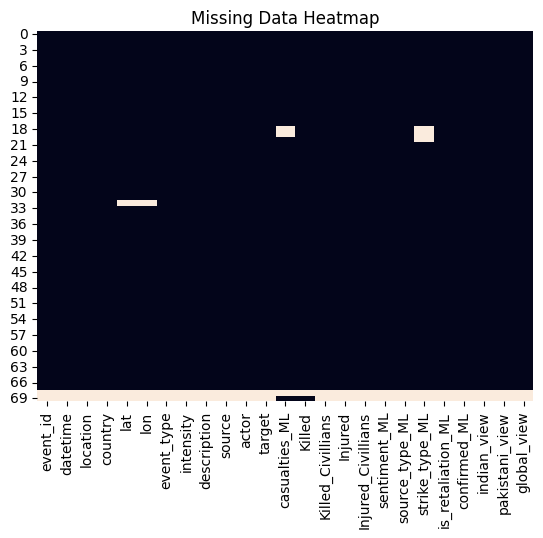

In [18]:
sns.heatmap(events_df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

In [19]:
events_df.dtypes              # Data types

event_id              float64
datetime               object
location               object
country                object
lat                   float64
lon                   float64
event_type             object
intensity              object
description            object
source                 object
actor                  object
target                 object
casualties_ML          object
Killed                float64
Killed_Civillians     float64
Injured               float64
Injured_Civillians    float64
sentiment_ML           object
source_type_ML         object
strike_type_ML         object
is_retaliation_ML      object
confirmed_ML           object
indian_view            object
pakistani_view         object
global_view            object
dtype: object

In [20]:
events_df.nunique()           # Unique values per column

event_id              45
datetime               7
location              34
country                3
lat                   31
lon                   29
event_type            25
intensity              9
description           45
source                22
actor                 12
target                21
casualties_ML         21
Killed                10
Killed_Civillians      7
Injured                8
Injured_Civillians     3
sentiment_ML          11
source_type_ML         6
strike_type_ML        17
is_retaliation_ML      3
confirmed_ML           3
indian_view           45
pakistani_view        45
global_view           45
dtype: int64

In [21]:
events_df.duplicated().sum()

0

## Data Wrangling

In [23]:
events_df

,event_id,datetime,location,country,lat,lon,event_type,intensity,description,source,...,Injured,Injured_Civillians,sentiment_ML,source_type_ML,strike_type_ML,is_retaliation_ML,confirmed_ML,indian_view,pakistani_view,global_view
0,20.0,07/05/2025,Ahmedpur East,Pakistan,29.14,71.26,Airstrike,High,"Indian airstrike killed 13 civilians, includin...",https://tribune.com.pk/,...,37.0,0.0,Negative,News,Aerial Bombardment,FALSE,TRUE,No specific mention of Ahmedpur East in Indian...,"Highlighted as a massacre of civilians, citing...",This specific strike was not isolated in inter...
1,24.0,07/05/2025,Ahmedpur East,Pakistan,29.14,71.26,Airstrike,High,Indian airstrike killed 13 civilians including...,https://tribune.com.pk/,...,37.0,0.0,Negative,News Media,Missile/Air/Drone Strike,FALSE,TRUE,Indian authorities did not acknowledge this sp...,Heavily emphasized the civilian toll—particula...,Although this strike wasn't cited individually...
2,29.0,07/05/2025,Ahmedpur East,Pakistan,29.14,71.26,airstrike,high,13 civilians martyred including children and w...,https://www.thenews.com.pk/latest/1309099-thre...,...,37.0,0.0,negative,news,airstrike,FALSE,TRUE,No Indian media acknowledged this mosque strik...,Framed as a deliberate and brutal attack on a ...,This specific incident was not reported in glo...
3,45.0,07/05/2025,Ankara,Turkey,39.92,32.85,Diplomatic Support,Medium,Turkey and Azerbaijan issued official statemen...,https://www.hindustantimes.com/india-news/turk...,...,0.0,0.0,Negative towards India,News,Diplomatic,FALSE,TRUE,Indian media framed these statements as predic...,Welcomed the diplomatic support as validation ...,The international reaction was mixed—while som...
4,3.0,07/05/2025,Bahawalpur,Pakistan,29.40,71.68,Airspace Incursion,High,Suspected IAF jets breached Pakistani airspace...,Express Tribune,...,0.0,0.0,-,-,-,-,-,(No official Indian acknowledgement or reporti...,Pakistani media framed the incident as a viola...,(No global reports on this specific airspace i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,6.0,07/05/2025,Sialkot,Pakistan,32.50,74.53,Warning Issued,Low,Civil defense issued air raid warning sirens i...,ARY News,...,0.0,0.0,-,-,-,-,-,No Indian media acknowledged the Sialkot alert...,Reported as a precautionary measure in anticip...,No global media reported on the Sialkot alert ...
66,10.0,07/05/2025,Srinagar,India,34.08,74.80,Media Briefing,Low,Indian military held press conference in Srina...,India Today,...,0.0,0.0,-,-,-,-,-,"Emphasized India’s preparedness and restraint,...","No response reported at this time, although Pa...",No international media covered the Srinagar pr...
67,43.0,07/05/2025,Surat,India,21.17,72.83,civil defence drill,low,India conducted full-scale civil defence mock ...,https://www.hindustantimes.com/india-news/blac...,...,0.0,0.0,neutral,news,simulation,FALSE,TRUE,Portrayed as a proactive and responsible move ...,Framed as fear-mongering and a sign of India b...,Some global media referenced the drills as a r...
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Print all column names to double-check:
print(events_df.columns.tolist())


['event_id', 'datetime', 'location', 'country', 'lat', 'lon', 'event_type', 'intensity', 'description', 'source', 'actor', 'target', 'casualties_ML', 'Killed', 'Killed_Civillians', 'Injured', 'Injured_Civillians', 'sentiment_ML', 'source_type_ML', 'strike_type_ML', 'is_retaliation_ML', 'confirmed_ML', 'indian_view', 'pakistani_view', 'global_view']


In [25]:
# 1. Convert datetime to proper format
events_df['datetime'] = pd.to_datetime(events_df['datetime'], errors='coerce')


In [26]:
# 2. Convert Boolean-like Strings to True/False
events_df['is_retaliation_ML'] = events_df['is_retaliation_ML'].str.upper().map({'TRUE': True, 'FALSE': False})
events_df['confirmed_ML'] = events_df['confirmed_ML'].str.upper().map({'TRUE': True, 'FALSE': False})


In [27]:
# 4. Standardize Categorical Strings
events_df['event_type'] = events_df['event_type'].str.strip().str.title()
events_df['intensity'] = events_df['intensity'].str.strip().str.lower()


In [28]:
# 5. Derive New Analytical Columns (Optional but useful)
events_df['Total_Casualties'] = events_df['Killed'] + events_df['Injured']
events_df['Civilians_Affected'] = events_df['Killed_Civillians'] + events_df['Injured_Civillians']
events_df['is_civilian_event'] = events_df['Civilians_Affected'] > 0

events_df.head()

,event_id,datetime,location,country,lat,lon,event_type,intensity,description,source,...,source_type_ML,strike_type_ML,is_retaliation_ML,confirmed_ML,indian_view,pakistani_view,global_view,Total_Casualties,Civilians_Affected,is_civilian_event
0,20.0,2025-07-05,Ahmedpur East,Pakistan,29.14,71.26,Airstrike,high,"Indian airstrike killed 13 civilians, includin...",https://tribune.com.pk/,...,News,Aerial Bombardment,False,True,No specific mention of Ahmedpur East in Indian...,"Highlighted as a massacre of civilians, citing...",This specific strike was not isolated in inter...,50.0,13.0,True
1,24.0,2025-07-05,Ahmedpur East,Pakistan,29.14,71.26,Airstrike,high,Indian airstrike killed 13 civilians including...,https://tribune.com.pk/,...,News Media,Missile/Air/Drone Strike,False,True,Indian authorities did not acknowledge this sp...,Heavily emphasized the civilian toll—particula...,Although this strike wasn't cited individually...,50.0,13.0,True
2,29.0,2025-07-05,Ahmedpur East,Pakistan,29.14,71.26,Airstrike,high,13 civilians martyred including children and w...,https://www.thenews.com.pk/latest/1309099-thre...,...,news,airstrike,False,True,No Indian media acknowledged this mosque strik...,Framed as a deliberate and brutal attack on a ...,This specific incident was not reported in glo...,50.0,13.0,True
3,45.0,2025-07-05,Ankara,Turkey,39.92,32.85,Diplomatic Support,medium,Turkey and Azerbaijan issued official statemen...,https://www.hindustantimes.com/india-news/turk...,...,News,Diplomatic,False,True,Indian media framed these statements as predic...,Welcomed the diplomatic support as validation ...,The international reaction was mixed—while som...,0.0,0.0,False
4,3.0,2025-07-05,Bahawalpur,Pakistan,29.40,71.68,Airspace Incursion,high,Suspected IAF jets breached Pakistani airspace...,Express Tribune,...,-,-,NaN,NaN,(No official Indian acknowledgement or reporti...,Pakistani media framed the incident as a viola...,(No global reports on this specific airspace i...,0.0,0.0,False


In [29]:
# 6. Drop Duplicates (if any)
events_df = events_df.drop_duplicates()


### Split events_df into:

1. events_table – 1 row per unique event_id
2. locations_table – multiple rows per event, 1 row per location



In [32]:
# Step 1: Create events_table
# Define event-level fields (excluding lat/lon/location)
event_cols = [
    'event_id', 'datetime', 'country', 'event_type', 'intensity', 'description',
    'source', 'actor', 'target', 'casualties_ML', 'Killed', 'Killed_Civillians',
    'Injured', 'Injured_Civillians', 'sentiment_ML', 'source_type_ML',
    'strike_type_ML', 'is_retaliation_ML', 'confirmed_ML',
    'indian_view', 'pakistani_view', 'global_view'
]

events_table = events_df[event_cols].drop_duplicates(subset='event_id')

events_table.head()

,event_id,datetime,country,event_type,intensity,description,source,actor,target,casualties_ML,...,Injured,Injured_Civillians,sentiment_ML,source_type_ML,strike_type_ML,is_retaliation_ML,confirmed_ML,indian_view,pakistani_view,global_view
0,20.0,2025-07-05,Pakistan,Airstrike,high,"Indian airstrike killed 13 civilians, includin...",https://tribune.com.pk/,India,Pakistani civilians,50,...,37.0,0.0,Negative,News,Aerial Bombardment,False,True,No specific mention of Ahmedpur East in Indian...,"Highlighted as a massacre of civilians, citing...",This specific strike was not isolated in inter...
1,24.0,2025-07-05,Pakistan,Airstrike,high,Indian airstrike killed 13 civilians including...,https://tribune.com.pk/,India,Pakistani civilians,50,...,37.0,0.0,Negative,News Media,Missile/Air/Drone Strike,False,True,Indian authorities did not acknowledge this sp...,Heavily emphasized the civilian toll—particula...,Although this strike wasn't cited individually...
2,29.0,2025-07-05,Pakistan,Airstrike,high,13 civilians martyred including children and w...,https://www.thenews.com.pk/latest/1309099-thre...,India,Pakistan civilians,50,...,37.0,0.0,negative,news,airstrike,False,True,No Indian media acknowledged this mosque strik...,Framed as a deliberate and brutal attack on a ...,This specific incident was not reported in glo...
3,45.0,2025-07-05,Turkey,Diplomatic Support,medium,Turkey and Azerbaijan issued official statemen...,https://www.hindustantimes.com/india-news/turk...,"Turkey, Azerbaijan, Qatar",India,0,...,0.0,0.0,Negative towards India,News,Diplomatic,False,True,Indian media framed these statements as predic...,Welcomed the diplomatic support as validation ...,The international reaction was mixed—while som...
4,3.0,2025-07-05,Pakistan,Airspace Incursion,high,Suspected IAF jets breached Pakistani airspace...,Express Tribune,-,-,-,...,0.0,0.0,-,-,-,NaN,NaN,(No official Indian acknowledgement or reporti...,Pakistani media framed the incident as a viola...,(No global reports on this specific airspace i...


In [33]:
# Step 2: Create locations_table
location_cols = ['event_id', 'location', 'lat', 'lon']
locations_table = events_df[location_cols].drop_duplicates()

locations_table.head()

,event_id,location,lat,lon
0,20.0,Ahmedpur East,29.14,71.26
1,24.0,Ahmedpur East,29.14,71.26
2,29.0,Ahmedpur East,29.14,71.26
3,45.0,Ankara,39.92,32.85
4,3.0,Bahawalpur,29.40,71.68


In [34]:
# Step 3: Sanity Check
print("Events Table:", events_table.shape)
print("Locations Table:", locations_table.shape)

# Optional: Check for orphaned locations or duplicate entries
assert events_table['event_id'].is_unique
assert locations_table['event_id'].isin(events_table['event_id']).all()


Events Table: (46, 22)
Locations Table: (69, 4)


In [35]:
events_table

,event_id,datetime,country,event_type,intensity,description,source,actor,target,casualties_ML,...,Injured,Injured_Civillians,sentiment_ML,source_type_ML,strike_type_ML,is_retaliation_ML,confirmed_ML,indian_view,pakistani_view,global_view
0,20.0,2025-07-05,Pakistan,Airstrike,high,"Indian airstrike killed 13 civilians, includin...",https://tribune.com.pk/,India,Pakistani civilians,50,...,37.0,0.0,Negative,News,Aerial Bombardment,False,True,No specific mention of Ahmedpur East in Indian...,"Highlighted as a massacre of civilians, citing...",This specific strike was not isolated in inter...
1,24.0,2025-07-05,Pakistan,Airstrike,high,Indian airstrike killed 13 civilians including...,https://tribune.com.pk/,India,Pakistani civilians,50,...,37.0,0.0,Negative,News Media,Missile/Air/Drone Strike,False,True,Indian authorities did not acknowledge this sp...,Heavily emphasized the civilian toll—particula...,Although this strike wasn't cited individually...
2,29.0,2025-07-05,Pakistan,Airstrike,high,13 civilians martyred including children and w...,https://www.thenews.com.pk/latest/1309099-thre...,India,Pakistan civilians,50,...,37.0,0.0,negative,news,airstrike,False,True,No Indian media acknowledged this mosque strik...,Framed as a deliberate and brutal attack on a ...,This specific incident was not reported in glo...
3,45.0,2025-07-05,Turkey,Diplomatic Support,medium,Turkey and Azerbaijan issued official statemen...,https://www.hindustantimes.com/india-news/turk...,"Turkey, Azerbaijan, Qatar",India,0,...,0.0,0.0,Negative towards India,News,Diplomatic,False,True,Indian media framed these statements as predic...,Welcomed the diplomatic support as validation ...,The international reaction was mixed—while som...
4,3.0,2025-07-05,Pakistan,Airspace Incursion,high,Suspected IAF jets breached Pakistani airspace...,Express Tribune,-,-,-,...,0.0,0.0,-,-,-,NaN,NaN,(No official Indian acknowledgement or reporti...,Pakistani media framed the incident as a viola...,(No global reports on this specific airspace i...
5,11.0,NaT,Pakistan,Airstrike,high,India launched missile strikes on 9 locations ...,https://www.thetimes.com/world/asia/article/in...,India,Pakistan,"8 killed (5 civilians), 35 injured (31 civilians)",...,35.0,31.0,Negative,News,Missile,False,True,"Indian military launched ""Operation Sindoor"" a...","Reported significant civilian casualties, incl...",The Times confirmed strikes and cited both sid...
6,12.0,NaT,Pakistan,Retaliatory Strike / Air Defense,medium,Pakistan shot down two Indian jets and claimed...,https://www.thetimes.com/world/asia/article/in...,Pakistan,India,"Unconfirmed aircraft downing, unknown casualties",...,0.0,0.0,Defensive,News,Air Defense / Counterattack,True,NaN,Indian sources did not confirm the downing of ...,Framed the action as a justified and proportio...,International media like The Times reported Pa...
7,15.0,NaT,Pakistan,Airstrike,high,India launched targeted missile strikes on all...,https://www.bild.de/politik/kaschmir-konflikt-...,India,Pakistan,"26 civilians killed, 46 injured (Pakistan)",...,46.0,0.0,Negative,News,Missile,False,True,Framed the strikes as part of a surgical anti-...,"Condemned the strikes as a massacre, reporting...",Bild.de echoed Pakistani casualty figures and ...
8,17.0,2025-07-05,Pakistan,Airstrike,high,"Indian strike on Bahawalpur killed 13, includi...",https://www.dawn.com/,India,Civilians,50,...,37.0,0.0,negative,news,airstrike,False,True,No Indian media confirmed the incident in Baha...,"Framed as a deliberate attack on civilians, es...",No global outlets directly reported this speci...
11,42.0,2025-07-05,Pakistan,Air Strike Casualties,high,Masood Azhar claims 10 family members killed i...,https://www.hindustantimes.com/,Indian Armed Forces,Azhar family compound (likely associated with ...,10 killed (unverified),...,0.0,0.0,Mixed,News Article,Air Strike,True,NaN,Indian media framed the strike as targeting hi...,"Positioned the casualties as civilian, downpla...","This detail was refe

In [36]:
exact_dupes = events_df.duplicated(subset=[
    'datetime', 'location', 'event_type', 'Killed', 'Injured'
])
events_df[exact_dupes]


,event_id,datetime,location,country,lat,lon,event_type,intensity,description,source,...,source_type_ML,strike_type_ML,is_retaliation_ML,confirmed_ML,indian_view,pakistani_view,global_view,Total_Casualties,Civilians_Affected,is_civilian_event
1,24.0,2025-07-05,Ahmedpur East,Pakistan,29.14,71.26,Airstrike,high,Indian airstrike killed 13 civilians including...,https://tribune.com.pk/,...,News Media,Missile/Air/Drone Strike,False,True,Indian authorities did not acknowledge this sp...,Heavily emphasized the civilian toll—particula...,Although this strike wasn't cited individually...,50.0,13.0,True
2,29.0,2025-07-05,Ahmedpur East,Pakistan,29.14,71.26,Airstrike,high,13 civilians martyred including children and w...,https://www.thenews.com.pk/latest/1309099-thre...,...,news,airstrike,False,True,No Indian media acknowledged this mosque strik...,Framed as a deliberate and brutal attack on a ...,This specific incident was not reported in glo...,50.0,13.0,True
9,20.0,2025-07-05,Bahawalpur,Pakistan,29.39,71.68,Airstrike,high,"Indian airstrike killed 13 civilians, includin...",https://tribune.com.pk/,...,News,Aerial Bombardment,False,True,No specific mention of Ahmedpur East in Indian...,"Highlighted as a massacre of civilians, citing...",This specific strike was not isolated in inter...,50.0,13.0,True
10,24.0,2025-07-05,Bahawalpur,Pakistan,29.39,71.68,Airstrike,high,Indian airstrike killed 13 civilians including...,https://tribune.com.pk/,...,News Media,Missile/Air/Drone Strike,False,True,Indian authorities did not acknowledge this sp...,Heavily emphasized the civilian toll—particula...,Although this strike wasn't cited individually...,50.0,13.0,True
27,26.0,2025-07-05,Kotli,Pakistan,33.52,73.90,Airstrike,medium,Strike on Abbas Mosque killed two teenagers; w...,https://tribune.com.pk/,...,News Media,Airstrike,False,True,No acknowledgment from Indian media regarding ...,"Echoed earlier Dawn coverage, highlighting the...","Not directly covered in international media, b...",4.0,4.0,True
28,31.0,2025-07-05,Kotli,Pakistan,33.52,73.90,Airstrike,medium,"2 teenagers martyred, mother and child injured...",https://www.thenews.com.pk/latest/1309099-thre...,...,news,airstrike,False,True,No coverage or acknowledgment of this strike. ...,"Reported as a war crime, emphasizing the youth...",This mosque-specific strike was not directly r...,4.0,4.0,True
32,27.0,2025-07-05,LoC,Pakistan,NaN,NaN,Shelling,low,Indian firing along LoC killed 5 civilians inc...,https://tribune.com.pk/,...,News Media,Firing,False,True,Framed shelling as a defensive measure against...,"Strongly condemned the incident, highlighting ...","While not specifically covered, this incident ...",5.0,0.0,False
43,32.0,2025-07-05,Muridke,Pakistan,31.80,74.25,Airstrike,medium,"3 men martyred, one injured in Indian strike",https://www.thenews.com.pk/latest/1309099-thre...,...,news,airstrike,False,True,Indian outlets made no mention of the strike o...,Framed as further evidence of India's disregar...,This specific strike was not reported in inter...,4.0,0.0,False
47,15.0,NaT,Muzaffarabad,Pakistan,34.36,73.47,Airstrike,high,India launched targeted missile strikes on all...,https://www.bild.de/politik/kaschmir-konflikt-...,...,News,Missile,False,True,Framed the strikes as part of a surgical anti-...,"Condemned the strikes as a massacre, reporting...",Bild.de echoed Pakistani casualty figures and ...,72.0,26.0,True
50,25.0,2025-07-05,Muzaffarabad,Pakistan,34.36,73.47,Airstrike,medium,Strike on Bilal Mosque killed 3 people; 2 chil...,https://tribune.com.pk/,...,News Media,Airstrike,False,True,No Indian confirmation of this incident. Offic...,Reiterated this as part of a pattern of attack...,The incident wasn’t individually highlighted i...,5.0,5.0,True


## Exploratory Data Analysis (EDA)


In [38]:
# Step 1: Import Libraries and Load Data
# Load your dataset
events_df = pd.read_csv("data/events_with_viewpoints.csv", encoding='ISO-8859-1')


In [39]:
casualty_cols = ['Killed', 'Injured', 'Killed_Civillians', 'Injured_Civillians']
events_df[casualty_cols] = events_df[casualty_cols].apply(pd.to_numeric, errors='coerce')

In [40]:
casualty_data = events_df[
    (events_df['Killed'] > 0) |
    (events_df['Injured'] > 0) |
    (events_df['Killed_Civillians'] > 0) |
    (events_df['Injured_Civillians'] > 0)
]

In [41]:
casualty_data

,event_id,datetime,location,country,lat,lon,event_type,intensity,description,source,...,Injured,Injured_Civillians,sentiment_ML,source_type_ML,strike_type_ML,is_retaliation_ML,confirmed_ML,indian_view,pakistani_view,global_view
0,20.0,07/05/2025,Ahmedpur East,Pakistan,29.14,71.26,Airstrike,High,"Indian airstrike killed 13 civilians, includin...",https://tribune.com.pk/,...,37.0,0.0,Negative,News,Aerial Bombardment,FALSE,TRUE,No specific mention of Ahmedpur East in Indian...,"Highlighted as a massacre of civilians, citing...",This specific strike was not isolated in inter...
1,24.0,07/05/2025,Ahmedpur East,Pakistan,29.14,71.26,Airstrike,High,Indian airstrike killed 13 civilians including...,https://tribune.com.pk/,...,37.0,0.0,Negative,News Media,Missile/Air/Drone Strike,FALSE,TRUE,Indian authorities did not acknowledge this sp...,Heavily emphasized the civilian tollparticula...,Although this strike wasn't cited individually...
2,29.0,07/05/2025,Ahmedpur East,Pakistan,29.14,71.26,airstrike,high,13 civilians martyred including children and w...,https://www.thenews.com.pk/latest/1309099-thre...,...,37.0,0.0,negative,news,airstrike,FALSE,TRUE,No Indian media acknowledged this mosque strik...,Framed as a deliberate and brutal attack on a ...,This specific incident was not reported in glo...
5,11.0,2025-05-06T23:59:00+05:00,Bahawalpur,Pakistan,29.40,71.68,Airstrike,High,India launched missile strikes on 9 locations ...,https://www.thetimes.com/world/asia/article/in...,...,35.0,31.0,Negative,News,Missile,FALSE,TRUE,"Indian military launched ""Operation Sindoor"" a...","Reported significant civilian casualties, incl...",The Times confirmed strikes and cited both sid...
7,15.0,2025-05-07T01:00:00+05:00,Bahawalpur,Pakistan,29.40,71.68,Airstrike,High,India launched targeted missile strikes on all...,https://www.bild.de/politik/kaschmir-konflikt-...,...,46.0,0.0,Negative,News,Missile,FALSE,TRUE,Framed the strikes as part of a surgical anti-...,"Condemned the strikes as a massacre, reporting...",Bild.de echoed Pakistani casualty figures and ...
8,17.0,07/05/2025,Bahawalpur,Pakistan,29.39,71.68,airstrike,high,"Indian strike on Bahawalpur killed 13, includi...",https://www.dawn.com/,...,37.0,0.0,negative,news,airstrike,FALSE,TRUE,No Indian media confirmed the incident in Baha...,"Framed as a deliberate attack on civilians, es...",No global outlets directly reported this speci...
9,20.0,07/05/2025,Bahawalpur,Pakistan,29.39,71.68,Airstrike,High,"Indian airstrike killed 13 civilians, includin...",https://tribune.com.pk/,...,37.0,0.0,Negative,News,Aerial Bombardment,FALSE,TRUE,No specific mention of Ahmedpur East in Indian...,"Highlighted as a massacre of civilians, citing...",This specific strike was not isolated in inter...
10,24.0,07/05/2025,Bahawalpur,Pakistan,29.39,71.68,Airstrike,High,Indian airstrike killed 13 civilians including...,https://tribune.com.pk/,...,37.0,0.0,Negative,News Media,Missile/Air/Drone Strike,FALSE,TRUE,Indian authorities did not acknowledge this sp...,Heavily emphasized the civilian tollparticula...,Although this strike wasn't cited individually...
11,42.0,07/05/2025,Bahawalpur,Pakistan,29.39,71.68,Air Strike Casualties,High,Masood Azhar claims 10 family members killed i...,https://www.hindustantimes.com/,...,0.0,0.0,Mixed,News Article,Air Strike,TRUE,Partially,Indian media framed the strike as targeting hi...,"Positioned the casualties as civilian, downpla...","This detail was referenced cautiously, with mo..."
17,13.0,2025-05-07T18:00:00+05:00,India Occupied Kashmir,Pakistan,31.15,75.34,Airstrike,Very High,India conducted missile strikes on nine sites ...,https://www.reuters.com/world/asia-pacific/mul...,...,43.0,0.0,Negative,News,Precision Missile Strike,FALSE,TRUE,Reinforced justification of Operation Sindoor ...,"Strongly condemned the strikes, emphasizing th...","Reuters covered the strikes in detail, highlig..."


So now that we have the casualty data we now aggregate the location based data to avoid duplication - as the data has been taken from news reports of 2 days. By ensuring we have the aggregate of areas with the same name to not duplicate report the numbers.

In [43]:
# Step 1: Group by location and compute mean values
location_means = casualty_data.groupby('location', as_index=False).agg({
    'Killed': 'mean',
    'Injured': 'mean',
    'Killed_Civillians': 'mean',
    'Injured_Civillians': 'mean',
    'lat': 'mean',
    'lon': 'mean'
})

# Step 2: Add a column for mean total casualties
location_means['Mean_Total_Casualties'] = location_means['Killed'] + location_means['Injured']

# Step 3: Round to whole numbers
cols_to_round = ['Killed', 'Injured', 'Killed_Civillians', 'Injured_Civillians', 'Mean_Total_Casualties']
location_means[cols_to_round] = location_means[cols_to_round].round(0).astype(int)

# Optional: Round lat/lon to 2 decimal places for cleaner output
location_means[['lat', 'lon']] = location_means[['lat', 'lon']].round(2)

# Step 4: Preview
location_means

,location,Killed,Injured,Killed_Civillians,Injured_Civillians,lat,lon,Mean_Total_Casualties
0,Ahmedpur East,13,37,13,0,29.14,71.26,50
1,Bahawalpur,14,32,12,5,29.39,71.68,46
2,India Occupied Kashmir,0,43,0,0,31.15,75.34,43
3,Kotli,7,14,6,6,33.52,73.90,22
4,LoC,5,0,2,0,34.00,74.00,5
5,Masjid Abbas,2,2,2,2,33.52,73.90,4
6,Masjid Bilal,3,2,3,2,34.37,73.47,5
7,Masjid Subhanullah,13,37,13,0,29.14,71.26,50
8,Masjid Ummul Qura,3,1,0,0,31.80,74.26,4
9,Muridke,5,12,2,10,31.80,74.25,17


We notice that our data is still being duplicated as some sources have quoted macro locations i.e., coutnry, others have quoted provincial and then micro locations - hence we will address this duplication problem.

In [45]:
# Step 1: Create a simple rule-based classifier
def classify_location(name):
    name = name.lower()
    
    # Rule 1: If it contains keywords like 'masjid', 'camp', etc., it's micro
    micro_keywords = ['masjid', 'camp', 'base', 'school', 'hospital', 'checkpoint']
    if any(keyword in name for keyword in micro_keywords):
        return 'micro'
    
    # Rule 2: If it's a known vague national label → ignore
    if name in ['pakistan', 'india']:
        return 'ambiguous'

    # Rule 3: Else consider it macro (e.g. cities/districts)
    return 'macro'


In [46]:
# Step 2: Apply it to your DataFrame
location_means['location_type'] = location_means['location'].apply(classify_location)


In [47]:
# Step 3: Preview
location_means[['location', 'location_type']]


,location,location_type
0,Ahmedpur East,macro
1,Bahawalpur,macro
2,India Occupied Kashmir,macro
3,Kotli,macro
4,LoC,macro
5,Masjid Abbas,micro
6,Masjid Bilal,micro
7,Masjid Subhanullah,micro
8,Masjid Ummul Qura,micro
9,Muridke,macro


We will now create macro and micro level visualisations.

**Macro-Level Map**
- Shows districts, cities, or regions like Bahawalpur, Muzaffarabad, etc.
- Casualty data is shown with blue markers

**Micro-Level Map**
- Shows specific sites like Masjid Abbas, Masjid Ummul Qura, etc.
- Casualty data is shown with red markers

In [49]:
# STEP 1: Load and prepare dataset
events_df = pd.read_csv("data/events_with_viewpoints.csv", encoding='ISO-8859-1')

# Convert casualty-related columns to numeric
casualty_cols = ['Killed', 'Injured', 'Killed_Civillians', 'Injured_Civillians']
events_df[casualty_cols] = events_df[casualty_cols].apply(pd.to_numeric, errors='coerce')

# STEP 2: Filter for rows with reported casualties
casualty_data = events_df[
    (events_df['Killed'] > 0) |
    (events_df['Injured'] > 0) |
    (events_df['Killed_Civillians'] > 0) |
    (events_df['Injured_Civillians'] > 0)
].copy()

# Clean location names (remove leading/trailing spaces)
casualty_data['location'] = casualty_data['location'].str.strip()

# STEP 3: Group by location and compute mean values
location_means = casualty_data.groupby('location', as_index=False).agg({
    'Killed': 'mean',
    'Injured': 'mean',
    'Killed_Civillians': 'mean',
    'Injured_Civillians': 'mean',
    'lat': 'mean',
    'lon': 'mean'
})

# Compute total casualties per location
location_means['Mean_Total_Casualties'] = location_means['Killed'] + location_means['Injured']

# Round numeric values
cols_to_round = ['Killed', 'Injured', 'Killed_Civillians', 'Injured_Civillians', 'Mean_Total_Casualties']
location_means[cols_to_round] = location_means[cols_to_round].round(0).astype(int)
location_means[['lat', 'lon']] = location_means[['lat', 'lon']].round(2)

# STEP 4: Classify locations into macro/micro categories
def classify_location(name):
    name = name.lower()
    micro_keywords = ['masjid', 'camp', 'base', 'school', 'hospital', 'checkpoint']
    if any(keyword in name for keyword in micro_keywords):
        return 'micro'
    elif name in ['pakistan', 'india']:
        return 'ambiguous'
    return 'macro'

location_means['location_type'] = location_means['location'].apply(classify_location)

# STEP 5: Filter classified types
macro_df = location_means[location_means['location_type'] == 'macro']
micro_df = location_means[location_means['location_type'] == 'micro']
# Optional: skip ambiguous locations entirely

# STEP 6: Create map for macro-level locations
macro_map = folium.Map(location=[macro_df['lat'].mean(), macro_df['lon'].mean()], zoom_start=6)

for _, row in macro_df.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=max(3, row['Mean_Total_Casualties'] / 5),
        popup=(f"<b>{row['location']}</b><br>"
               f"Killed: {row['Killed']}<br>"
               f"Injured: {row['Injured']}<br>"
               f"Total: {row['Mean_Total_Casualties']}"),
        color='blue',
        fill=True,
        fill_opacity=0.4
    ).add_to(macro_map)

# STEP 7: Create map for micro-level locations
micro_map = folium.Map(location=[micro_df['lat'].mean(), micro_df['lon'].mean()], zoom_start=6)

for _, row in micro_df.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=max(6, row['Mean_Total_Casualties'] / 2),
        popup=(f"<b>{row['location']}</b><br>"
               f"Killed: {row['Killed']}<br>"
               f"Injured: {row['Injured']}<br>"
               f"Total: {row['Mean_Total_Casualties']}"),
        color='crimson',
        fill=True,
        fill_opacity=0.6
    ).add_to(micro_map)

# STEP 8: Display both maps (run each individually in Jupyter)
macro_map  # View macro-level map


In [50]:
micro_map  # View micro-level map

## EDA for Macro and Micro Locations


Analyze the distribution of casualties

In [53]:
# Step 1: Generate Descriptive Stats
# Descriptive stats for casualty-related fields
macro_summary = macro_df[['Killed', 'Injured', 'Killed_Civillians', 'Injured_Civillians', 'Mean_Total_Casualties']].describe()
micro_summary = micro_df[['Killed', 'Injured', 'Killed_Civillians', 'Injured_Civillians', 'Mean_Total_Casualties']].describe()

# Preview the summaries
print("Macro Location Summary:\n", macro_summary)
print("\nMicro Location Summary:\n", micro_summary)


Macro Location Summary:
           Killed    Injured  Killed_Civillians  Injured_Civillians  \
count   9.000000   9.000000           9.000000            9.000000   
mean    9.444444  28.111111           5.555556            2.888889   
std     5.637178  17.488885           5.052502            3.723051   
min     0.000000   0.000000           0.000000            0.000000   
25%     5.000000  14.000000           2.000000            0.000000   
50%    10.000000  32.000000           5.000000            0.000000   
75%    13.000000  43.000000          10.000000            5.000000   
max    18.000000  50.000000          13.000000           10.000000   

       Mean_Total_Casualties  
count               9.000000  
mean               37.666667  
std                20.615528  
min                 5.000000  
25%                22.000000  
50%                43.000000  
75%                50.000000  
max                64.000000  

Micro Location Summary:
           Killed    Injured  Killed_Civ

In [54]:
# Step 2: Identify Top 5 High-Casualty Locations
# Sort by total casualties
top_macro = macro_df.sort_values(by='Mean_Total_Casualties', ascending=False).head(5)
top_micro = micro_df.sort_values(by='Mean_Total_Casualties', ascending=False).head(5)

# Display
print("Top 5 Macro Locations:\n", top_macro[['location', 'Mean_Total_Casualties']])
print("\nTop 5 Micro Locations:\n", top_micro[['location', 'Mean_Total_Casualties']])


Top 5 Macro Locations:
                      location  Mean_Total_Casualties
12  Pakistan Occupied Kashmir                     64
13                     Poonch                     63
0               Ahmedpur East                     50
1                  Bahawalpur                     46
2      India Occupied Kashmir                     43

Top 5 Micro Locations:
              location  Mean_Total_Casualties
7  Masjid Subhanullah                     50
6        Masjid Bilal                      5
5        Masjid Abbas                      4
8   Masjid Ummul Qura                      4


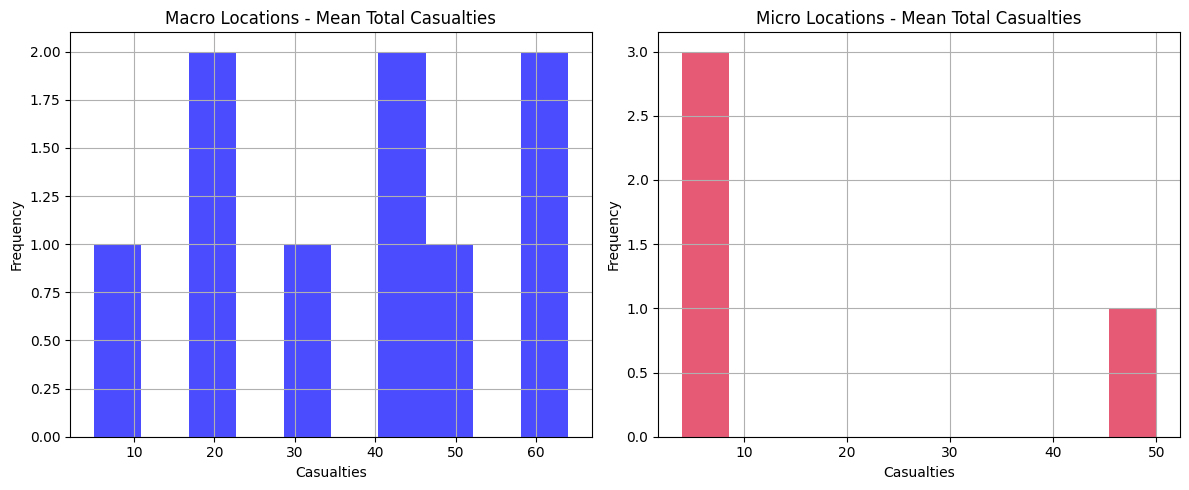

In [55]:
# Step 3: Plot Histograms
plt.figure(figsize=(12, 5))

# Macro
plt.subplot(1, 2, 1)
macro_df['Mean_Total_Casualties'].hist(bins=10, color='blue', alpha=0.7)
plt.title('Macro Locations - Mean Total Casualties')
plt.xlabel('Casualties')
plt.ylabel('Frequency')

# Micro
plt.subplot(1, 2, 2)
micro_df['Mean_Total_Casualties'].hist(bins=10, color='crimson', alpha=0.7)
plt.title('Micro Locations - Mean Total Casualties')
plt.xlabel('Casualties')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


C:\Users\Adam Kureshi\AppData\Local\Temp\ipykernel_23932\1762761676.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([macro_df['Mean_Total_Casualties'], micro_df['Mean_Total_Casualties']],


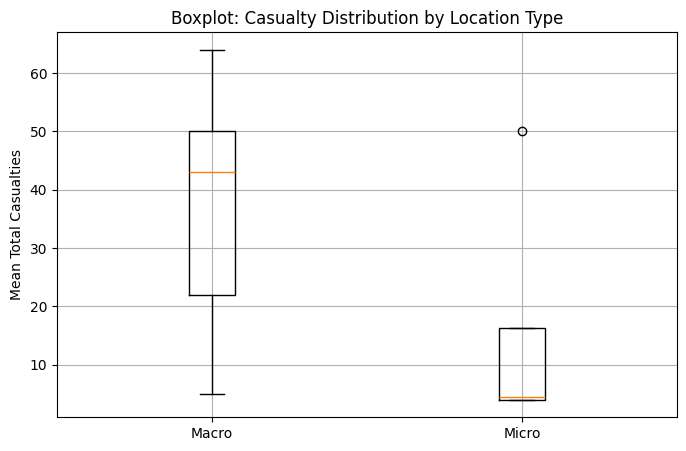

In [56]:
# Boxplot for Casualty Comparison
plt.figure(figsize=(8, 5))
plt.boxplot([macro_df['Mean_Total_Casualties'], micro_df['Mean_Total_Casualties']],
            labels=['Macro', 'Micro'])
plt.title('Boxplot: Casualty Distribution by Location Type')
plt.ylabel('Mean Total Casualties')
plt.grid(True)
plt.show()


<Axes: >

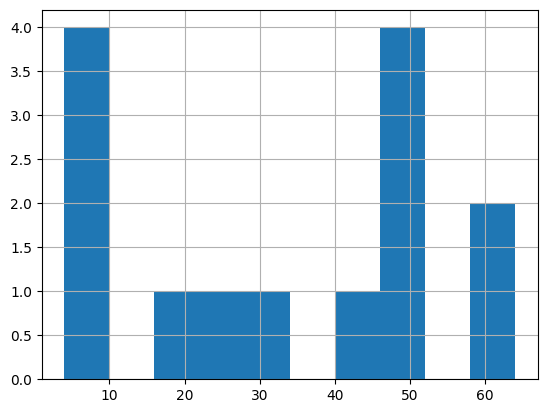

In [57]:
location_means['Mean_Total_Casualties'].hist(bins=10)

### Top N Locations by Casualties

In [59]:
top_n = 10  # Change to any number of top locations you want


In [60]:
# Top N Macro Locations
top_macro = macro_df.sort_values(by='Mean_Total_Casualties', ascending=False).head(top_n)

# Display as table
print(f"Top {top_n} Macro Locations by Mean Total Casualties:")
display(top_macro[['location', 'Killed', 'Injured', 'Mean_Total_Casualties']])


Top 10 Macro Locations by Mean Total Casualties:


,location,Killed,Injured,Mean_Total_Casualties
12,Pakistan Occupied Kashmir,18,46,64
13,Poonch,13,50,63
0,Ahmedpur East,13,37,50
1,Bahawalpur,14,32,46
2,India Occupied Kashmir,0,43,43
10,Muzaffarabad,10,19,29
3,Kotli,7,14,22
9,Muridke,5,12,17
4,LoC,5,0,5


In [61]:
# Top N Micro Locations
top_micro = micro_df.sort_values(by='Mean_Total_Casualties', ascending=False).head(top_n)

print(f"Top {top_n} Micro Locations by Mean Total Casualties:")
display(top_micro[['location', 'Killed', 'Injured', 'Mean_Total_Casualties']])


Top 10 Micro Locations by Mean Total Casualties:


,location,Killed,Injured,Mean_Total_Casualties
7,Masjid Subhanullah,13,37,50
6,Masjid Bilal,3,2,5
5,Masjid Abbas,2,2,4
8,Masjid Ummul Qura,3,1,4


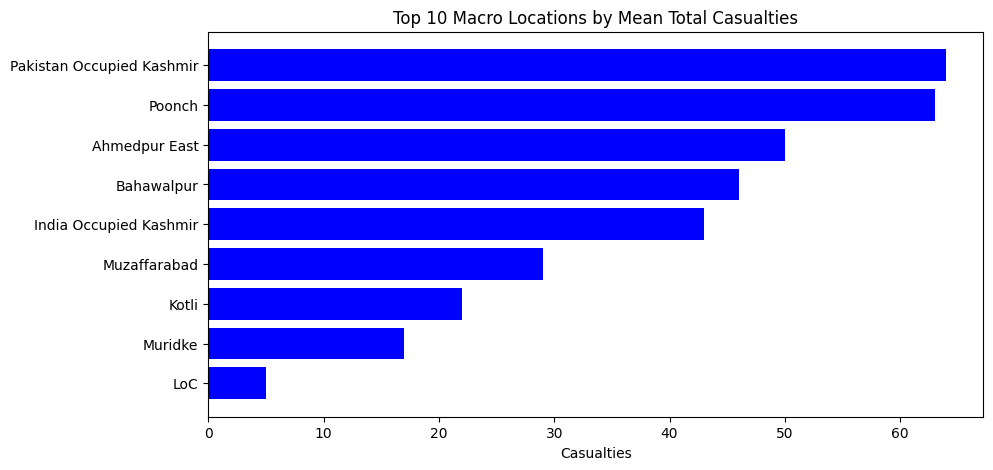

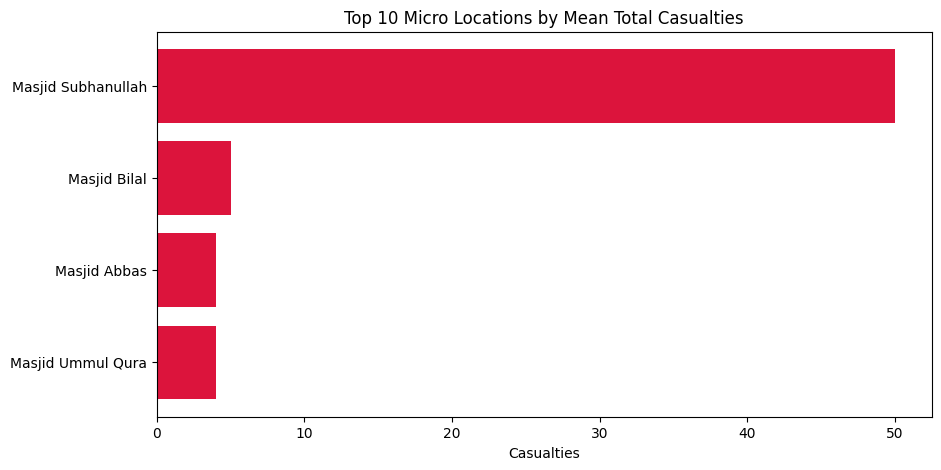

In [62]:
# Horizontal Bar Chart
# Plot macro locations
plt.figure(figsize=(10, 5))
plt.barh(top_macro['location'], top_macro['Mean_Total_Casualties'], color='blue')
plt.title(f'Top {top_n} Macro Locations by Mean Total Casualties')
plt.xlabel('Casualties')
plt.gca().invert_yaxis()
plt.show()

# Plot micro locations
plt.figure(figsize=(10, 5))
plt.barh(top_micro['location'], top_micro['Mean_Total_Casualties'], color='crimson')
plt.title(f'Top {top_n} Micro Locations by Mean Total Casualties')
plt.xlabel('Casualties')
plt.gca().invert_yaxis()
plt.show()


### Casualty Composition Analysis

We will compare the types of casualties:
- Killed vs Injured
- Civilians vs Non-civilians

We’ll answer:
- Are most casualties injuries or deaths? Are civilians disproportionately affected in micro sites?



In [65]:
macro_df[['Killed', 'Injured', 'Killed_Civillians', 'Injured_Civillians']].sum()

Killed                 85
Injured               253
Killed_Civillians      50
Injured_Civillians     26
dtype: int64

In [66]:
micro_df[['Killed', 'Injured', 'Killed_Civillians', 'Injured_Civillians']].sum()


Killed                21
Injured               42
Killed_Civillians     18
Injured_Civillians     4
dtype: int64

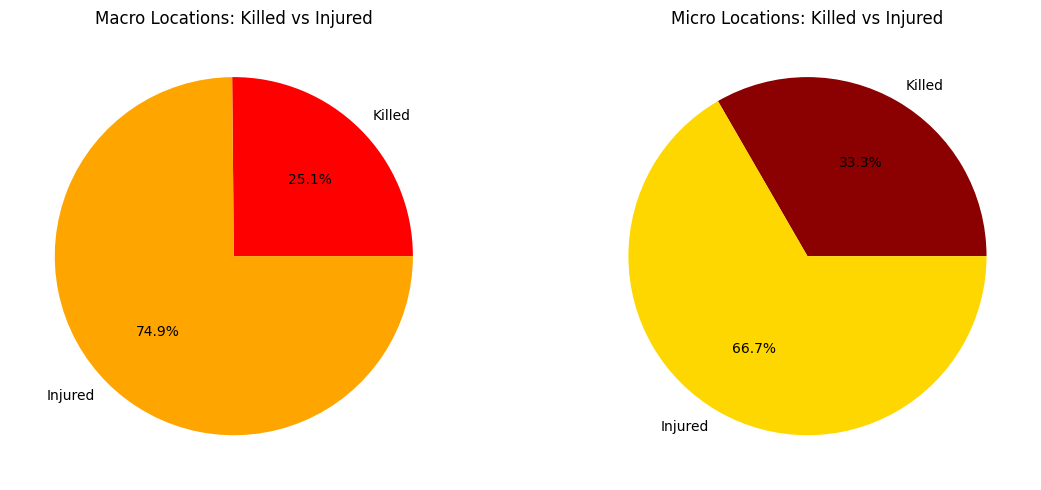

In [67]:
# Compute totals
macro_sums = macro_df[['Killed', 'Injured']].sum()
micro_sums = micro_df[['Killed', 'Injured']].sum()

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Macro Pie Chart
axes[0].pie(macro_sums, labels=['Killed', 'Injured'], autopct='%1.1f%%', colors=['red', 'orange'])
axes[0].set_title('Macro Locations: Killed vs Injured')

# Micro Pie Chart
axes[1].pie(micro_sums, labels=['Killed', 'Injured'], autopct='%1.1f%%', colors=['darkred', 'gold'])
axes[1].set_title('Micro Locations: Killed vs Injured')

plt.tight_layout()
plt.show()


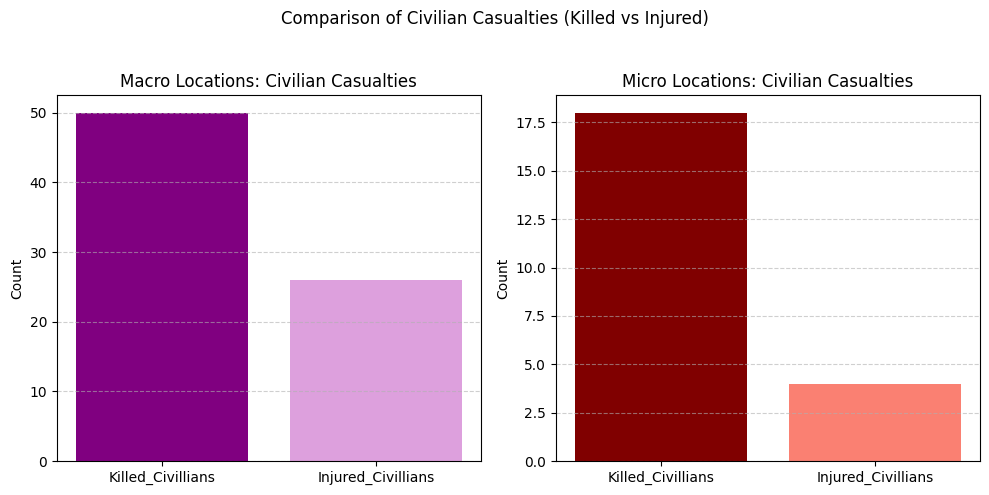

In [68]:
# Civilian Casualty Bar Chart for Jupyter Notebook
# Step 1: Calculate totals
macro_civilians = macro_df[['Killed_Civillians', 'Injured_Civillians']].sum()
micro_civilians = micro_df[['Killed_Civillians', 'Injured_Civillians']].sum()

# Step 2: Create bar chart
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Macro
axes[0].bar(macro_civilians.index, macro_civilians.values, color=['purple', 'plum'])
axes[0].set_title('Macro Locations: Civilian Casualties')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Micro
axes[1].bar(micro_civilians.index, micro_civilians.values, color=['maroon', 'salmon'])
axes[1].set_title('Micro Locations: Civilian Casualties')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

# Final touches
plt.suptitle("Comparison of Civilian Casualties (Killed vs Injured)")
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Step 3: Export to image
plt.savefig("civilian_casualty_comparison.png")
plt.show()
